In [20]:
import objgraph 
import pygame
from Projectile import Projectile, Bomb
from Enemy import Enemy, EnemyFactory
from Player import Player
from  Weapon import WeaponFactory
from Weapon import Weapon
import gc
import tracemalloc
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'guppy'

In [10]:
class NoFlyWeightEnemy():
    projectiles = pygame.sprite.Group()
    def __init__(self, name: str, image: pygame.Surface, weapon_name: str, speed: float, 
                 default_health: int, pos: tuple[float, float]):
        super().__init__()
        self.image = pygame.transform.scale(pygame.image.load("./Images/smallEnemy.png"), (50,50))
        self.rect = self.image.get_rect()
        self.speed = speed
        self.weapon = WeaponFactory.get(weapon_name)

        self.name = name
        self.health = default_health
        self.movement_vector = [0, 0]
        self.pos = list(pos)
        self.last_shot_time = pygame.time.get_ticks()
        
    def move(self, enemies: pygame.sprite.Group, player_pos: tuple[float, float], tDelta: float):
        self.movement_vector = (player_pos[0] - self.pos[0],
                               player_pos[1] - self.pos[1])
        self.movement_vector = Weapon.normalize_vector(self.movement_vector)
        self.pos[0] += self.movement_vector[0] * self.speed * tDelta
        self.pos[1] += self.movement_vector[1] * self.speed * tDelta
        
        # Collision test with other enemies
        self.movement_vector = [0, 0]
        for sprite in enemies:
            if sprite is self:
                continue
            if pygame.sprite.collide_circle(self, sprite):
                self.movement_vector[0] += self.pos[0] - sprite.pos[0]
                self.movement_vector[1] += self.pos[1] - sprite.pos[1]

        self.movement_vector = Weapon.normalize_vector(self.movement_vector)
        self.pos[0] += self.movement_vector[0] * 0.5  # The constant is how far the sprite will be
        self.pos[1] += self.movement_vector[1] * 0.5  # dragged from the sprite it collided with
        
        self.rect.topleft = self.pos

    def attack(self, target_pos):
        self.weapon.attack(self, target_pos, self.last_shot_time)
        self.last_shot_time = pygame.time.get_ticks()

    def render(self, surface):
        surface.blit(self.image, self.pos)
    

In [14]:
# Start tracing
tracemalloc.start()

# Create instances of the Enemy class and measure memory growth
enemy_memory_growth = []

for i in range(1, 1001):  # Change the range based on your needs
    enemyFlyweight = EnemyFactory.get("small")

    # Measure memory usage after creating each instance
    current_memory = tracemalloc.get_traced_memory()[1] / 1024.0  # Convert to kilobytes
    enemy_memory_growth.append((i, current_memory))

# Stop tracing
tracemalloc.stop()

# Display memory growth over time
for i, memory in enemy_memory_growth:
    print(f"Enemy {i}: Memory = {memory:.2f} KB")

Enemy 1: Memory = 15.62 KB
Enemy 2: Memory = 15.62 KB
Enemy 3: Memory = 15.62 KB
Enemy 4: Memory = 15.62 KB
Enemy 5: Memory = 15.62 KB
Enemy 6: Memory = 15.62 KB
Enemy 7: Memory = 15.62 KB
Enemy 8: Memory = 15.62 KB
Enemy 9: Memory = 15.62 KB
Enemy 10: Memory = 15.62 KB
Enemy 11: Memory = 15.62 KB
Enemy 12: Memory = 15.62 KB
Enemy 13: Memory = 15.62 KB
Enemy 14: Memory = 15.62 KB
Enemy 15: Memory = 15.62 KB
Enemy 16: Memory = 15.62 KB
Enemy 17: Memory = 15.62 KB
Enemy 18: Memory = 15.62 KB
Enemy 19: Memory = 15.62 KB
Enemy 20: Memory = 15.62 KB
Enemy 21: Memory = 15.62 KB
Enemy 22: Memory = 15.62 KB
Enemy 23: Memory = 15.62 KB
Enemy 24: Memory = 15.62 KB
Enemy 25: Memory = 15.62 KB
Enemy 26: Memory = 15.62 KB
Enemy 27: Memory = 15.62 KB
Enemy 28: Memory = 15.62 KB
Enemy 29: Memory = 15.62 KB
Enemy 30: Memory = 15.62 KB
Enemy 31: Memory = 15.62 KB
Enemy 32: Memory = 15.62 KB
Enemy 33: Memory = 15.62 KB
Enemy 34: Memory = 15.62 KB
Enemy 35: Memory = 15.62 KB
Enemy 36: Memory = 15.62 KB
E

In [15]:
# Start tracing
tracemalloc.start()

# Create instances of the Enemy class and measure memory growth
enemy_memory_growth = []

for i in range(1, 1001):  # Change the range based on your needs
    enemy = Enemy(name="small", pos=(0, 0))

    # Measure memory usage after creating each instance
    current_memory = tracemalloc.get_traced_memory()[1] / 1024.0  # Convert to kilobytes
    enemy_memory_growth.append((i, current_memory))

# Stop tracing
tracemalloc.stop()

# Display memory growth over time
for i, memory in enemy_memory_growth:
    print(f"Enemy {i}: Memory = {memory:.2f} KB")

Enemy 1: Memory = 15.86 KB
Enemy 2: Memory = 15.86 KB
Enemy 3: Memory = 15.86 KB
Enemy 4: Memory = 15.86 KB
Enemy 5: Memory = 15.86 KB
Enemy 6: Memory = 15.86 KB
Enemy 7: Memory = 15.86 KB
Enemy 8: Memory = 15.86 KB
Enemy 9: Memory = 15.86 KB
Enemy 10: Memory = 15.86 KB
Enemy 11: Memory = 15.86 KB
Enemy 12: Memory = 15.86 KB
Enemy 13: Memory = 15.86 KB
Enemy 14: Memory = 15.86 KB
Enemy 15: Memory = 15.86 KB
Enemy 16: Memory = 15.86 KB
Enemy 17: Memory = 15.86 KB
Enemy 18: Memory = 15.86 KB
Enemy 19: Memory = 15.86 KB
Enemy 20: Memory = 15.86 KB
Enemy 21: Memory = 15.86 KB
Enemy 22: Memory = 15.86 KB
Enemy 23: Memory = 15.86 KB
Enemy 24: Memory = 15.86 KB
Enemy 25: Memory = 15.86 KB
Enemy 26: Memory = 15.86 KB
Enemy 27: Memory = 15.86 KB
Enemy 28: Memory = 15.86 KB
Enemy 29: Memory = 15.86 KB
Enemy 30: Memory = 15.86 KB
Enemy 31: Memory = 15.86 KB
Enemy 32: Memory = 15.86 KB
Enemy 33: Memory = 15.86 KB
Enemy 34: Memory = 15.86 KB
Enemy 35: Memory = 15.86 KB
Enemy 36: Memory = 15.86 KB
E

In [16]:
 # Start tracing
tracemalloc.start()

# Create instances of the Enemy class and measure memory growth
enemy_memory_growth = []

for i in range(1, 1001):  # Change the range based on your needs
    no_flyweight_enemy = NoFlyWeightEnemy(name = "small", image=pygame.image.load("./Images/smallEnemy.png"), weapon_name="small", speed=1, default_health=1, pos=(0,0))

    # Measure memory usage after creating each instance
    current_memory = tracemalloc.get_traced_memory()[1] / 1024.0  # Convert to kilobytes
    enemy_memory_growth.append((i, current_memory))

# Stop tracing
tracemalloc.stop()

# Display memory growth over time
for i, memory in enemy_memory_growth:
    print(f"Enemy {i}: Memory = {memory:.2f} KB")
    

Enemy 1: Memory = 17.57 KB
Enemy 2: Memory = 17.57 KB
Enemy 3: Memory = 17.57 KB
Enemy 4: Memory = 17.57 KB
Enemy 5: Memory = 17.57 KB
Enemy 6: Memory = 17.57 KB
Enemy 7: Memory = 17.57 KB
Enemy 8: Memory = 17.57 KB
Enemy 9: Memory = 17.57 KB
Enemy 10: Memory = 17.57 KB
Enemy 11: Memory = 17.57 KB
Enemy 12: Memory = 17.57 KB
Enemy 13: Memory = 17.57 KB
Enemy 14: Memory = 17.57 KB
Enemy 15: Memory = 17.57 KB
Enemy 16: Memory = 17.57 KB
Enemy 17: Memory = 17.57 KB
Enemy 18: Memory = 17.57 KB
Enemy 19: Memory = 17.57 KB
Enemy 20: Memory = 17.57 KB
Enemy 21: Memory = 17.57 KB
Enemy 22: Memory = 17.57 KB
Enemy 23: Memory = 17.57 KB
Enemy 24: Memory = 17.57 KB
Enemy 25: Memory = 17.57 KB
Enemy 26: Memory = 17.57 KB
Enemy 27: Memory = 17.57 KB
Enemy 28: Memory = 17.57 KB
Enemy 29: Memory = 17.57 KB
Enemy 30: Memory = 17.57 KB
Enemy 31: Memory = 17.57 KB
Enemy 32: Memory = 17.57 KB
Enemy 33: Memory = 17.57 KB
Enemy 34: Memory = 17.57 KB
Enemy 35: Memory = 17.57 KB
Enemy 36: Memory = 17.57 KB
E

In [17]:
def measure_memory_growth(create_instance_func):
    tracemalloc.start()
    memory_growth = []
    
    for i in range(1, 1001):
        instance = create_instance_func()
        current_memory = tracemalloc.get_traced_memory()[1] / 1024.0
        memory_growth.append((i, current_memory))
    
    tracemalloc.stop()
    return memory_growth

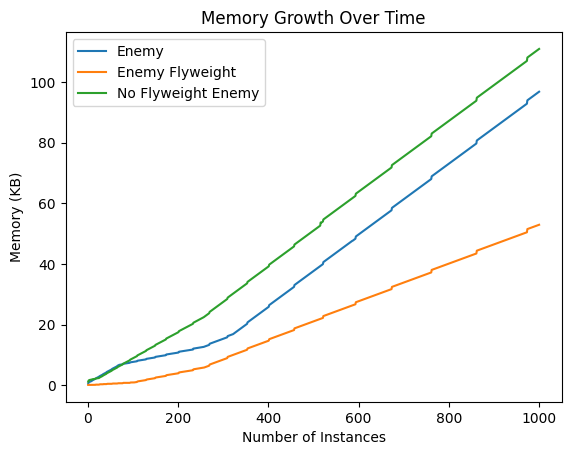

In [18]:
# Meausre memory growth for each class
enemy_memory_growth = measure_memory_growth(lambda: Enemy(name="small", pos=(0,0)))
enemy_flyweight_memory_growth = measure_memory_growth(lambda: EnemyFactory.get("small"))
no_flyweight_enemy_memory_growth = measure_memory_growth(lambda: NoFlyWeightEnemy(name = "small", image=pygame.image.load("./Images/smallEnemy.png"), weapon_name="small", speed=1, default_health=1, pos=(0,0)))

# Plot the results
plt.plot(*zip(*enemy_memory_growth), label="Enemy")
plt.plot(*zip(*enemy_flyweight_memory_growth), label="Enemy Flyweight")
plt.plot(*zip(*no_flyweight_enemy_memory_growth), label="No Flyweight Enemy")

plt.title("Memory Growth Over Time")
plt.xlabel("Number of Instances")
plt.ylabel("Memory (KB)")
plt.legend()
plt.show()